# **L'analyse de la panier de la menager a marjane**
# Introduction
Bienvenue dans ce projet de data science réalisé dans le cadre de mon MBA chez le groupe Marjane au Maroc. L'objectif de ce projet est d'analyser les transactions effectuées dans les magasins Marjane en utilisant l'algorithme FP-Growth pour l'extraction des motifs fréquents. Ce projet vise à découvrir des associations intéressantes entre les produits achetés par les clients afin d'améliorer la stratégie de vente et de merchandising de Marjane.

Les données utilisées dans ce projet comprennent les informations suivantes pour chaque transaction :

***TransactionID :*** Identifiant unique de la transaction.

***NomArticle :*** Nom de l'article acheté.

***NomRayon :*** Nom du rayon où l'article est situé.

***NomCategorie :*** Catégorie de l'article.

***NomSousCategorie :*** Sous-catégorie de l'article.

Ce notebook présentera le traitement et l'analyse de ces données pour
identifier des motifs fréquents d'achat à l'aide de l'algorithme FP-Growth.

# Table des matières

1.   Importation des librairies et chargement des données
*   Importation des librairies nécessaires
*   Chargement et visualisation des données brutes
2.   Préparation et nettoyage des données
*  Nettoyage des noms de colonnes
*  Vérification et gestion des valeurs manquantes
*  Transformation des données pour l'analyse
3.   Agrégation des transactions
* Groupement des transactions par TransactionID
*  Agrégation des articles et des autres colonnes
4.   Exploration des données
* Statistiques descriptives
* visualisation des transactions agrégées
5.   Application de l'algorithme FP-Growth
* Introduction à l'algorithme FP-Growth
* Préparation des données pour FP-Growth
* Exécution de l'algorithme et extraction des motifs fréquents
6.   Analyse des motifs fréquents
* Interprétation des résultats de FP-Growth
* Identification des associations produits intéressantes
7.   Recommandations et conclusions
* Suggestions basées sur les résultats obtenus
* Conclusion du projet

.


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel('ECH_DataMBAnalysis1.xlsx')

In [ ]:
data

,TransactionID,NomArticle,NomRayon,NomCategorie,NomSousCategorie
0,B0BZ0ZB0FBUZFUZ00BFZV,PACK JEBLI TRIO 150GX3,CREMERIE,FROMAGE,FROMAGE FRAIS
1,B0BZ0ZAUFBUZF11ABUFAU,SUCRE LINGOT 1KG COSUMAR,BISCUITERIE,SUCRE & EDULCORANTS,SUCRE
2,B0BZ0ZA1FBUZFAUUB1FAV,POUDRE DE CACAO AIGUEBELLE 5 SACHETS,BISCUITERIE,GATEAUX-DESSERT,AIDES PATISSERI
3,B0BZ0ZB0FBUZFA0ZU1FBV,PRINGLES SIZZL N CHILI CHEESE 160GR,BISCUITERIE,"GRAINES, CHIPS&BISCUITS APERITIFS",CHIPS&TORTILLAS
4,B0BZ0ZA1FBUZF00AVVFZ,TRANCHE FONDANT KHAYRAT 24 TR 400G,CREMERIE,FROMAGE,FROMAGE FONDU
...,...,...,...,...,...
172960,B0BZ0ZB0FBUZFYB0FAU,"LAIT EN POUDRE ENRICHI NIDO 2,4KG",BISCUITERIE,BOISSONS CHAUDES,LAITS
172961,B0BZ0ZA0FBUZFAU1F1,NORI 10 FEUILLES JESSY S,EPICERIE,PDTS DU MONDE,AIDE CULINAIRE
172962,B0BZ0ZAYFBUZF111YUFY,LENTILLE EXTRA CANADA 1KG FAYZ,EPICERIE,PATES FECULENTS,RIZ FECULENTS PUREE
172963,B0BZ0ZA1FBUZFZUAFAU,DANONE VANILLE 480G,CREMERIE,YAOURT&DESSERT,YAOURTS


In [ ]:
#vérifier les valeurs manquantes
print(data.isnull().sum())

#Fill missing values or drop rows/columns
data.dropna(inplace=True)  # This drops any row with a missing value


                     TransactionID    0
NomArticle                            0
NomRayon                              0
NomCategorie                          0
NomSousCategorie                      0
dtype: int64


In [ ]:


# Lire le fichier Excel
try:

    # Supprimer les espaces de début et de fin des noms de colonnes
    data.columns = data.columns.str.strip()

    # Afficher les noms de colonnes nettoyés pour vérifier
    print("Noms de colonnes nettoyés :", data.columns)

    # S'assurer que 'TransactionID' est traité comme une chaîne
    data['TransactionID'] = data['TransactionID'].astype(str)

    # Grouper par 'TransactionID' et agréger 'NomArticle' et les autres colonnes
    grouped_data = data.groupby('TransactionID').agg({
        'NomArticle': lambda x: ', '.join(x),
        'NomRayon': lambda x: ', '.join(x.unique()),
        'NomCategorie': lambda x: ', '.join(x.unique()),
        'NomSousCategorie': lambda x: ', '.join(x.unique())
    }).reset_index()

    # Afficher les premières lignes des transactions groupées pour comprendre la structure
    print(grouped_data.head())

    # Sauvegarder le DataFrame groupé dans un nouveau fichier Excel
    grouped_data.to_excel('/content/grouped_data.xlsx', index=False)  # Remplacez par votre chemin souhaité

except KeyError as e:
    print(f"Erreur de clé: {e}")
except Exception as e:
    print(f"Une erreur est survenue: {e}")



Noms de colonnes nettoyés : Index(['TransactionID', 'NomArticle', 'NomRayon', 'NomCategorie',
       'NomSousCategorie'],
      dtype='object')
         TransactionID                                         NomArticle  \
0  B0BZ0ZA0FBUZF000AFB  NECTAR VALENCIA PECHE 1L, DESSERT DÃ‰LICIMO ST...   
1  B0BZ0ZA0FBUZF000UFB  CONFITURE ABRICOT 21CL DELICIA, NECTAR ORANGE ...   
2  B0BZ0ZA0FBUZF000ZFB  LANGUE D OISEAU AL ITKANE 500G, FARINE FLEUR D...   
3  B0BZ0ZA0FBUZF00A0FB  CHEWING GUM TRIDENT PEPERMINT 14P, EAU MINERAL...   
4  B0BZ0ZA0FBUZF00ABFB  VINAIGRE BLANC 24 CL STAR, VERMICELLE DE RIZ 2...   

                                   NomRayon  \
0  LIQUIDE, CREMERIE, EPICERIE, BISCUITERIE   
1  BISCUITERIE, LIQUIDE, EPICERIE, CREMERIE   
2           EPICERIE, CREMERIE, BISCUITERIE   
3            BISCUITERIE, LIQUIDE, CREMERIE   
4                        EPICERIE, CREMERIE   

                                        NomCategorie  \
0  BOISS S/ALCOOL, YAOURT&DESSERT, CONSERVES & PL...  

In [ ]:
grouped_data

,TransactionID,NomArticle,NomRayon,NomCategorie,NomSousCategorie
0,B0BZ0ZA0FBUZF000AFB,"NECTAR VALENCIA PECHE 1L, DESSERT DÃ‰LICIMO ST...","LIQUIDE, CREMERIE, EPICERIE, BISCUITERIE","BOISS S/ALCOOL, YAOURT&DESSERT, CONSERVES & PL...","JUS, DESSERTS, CONSERVES DE POISSON, PATES ALI..."
1,B0BZ0ZA0FBUZF000UFB,"CONFITURE ABRICOT 21CL DELICIA, NECTAR ORANGE ...","BISCUITERIE, LIQUIDE, EPICERIE, CREMERIE","PETIT-DEJEUNER, BOISS S/ALCOOL, HUILES ASSAISO...","CONFITURE, JUS, HUILE VINAIGRE, FROMAGE FRAIS,..."
2,B0BZ0ZA0FBUZF000ZFB,"LANGUE D OISEAU AL ITKANE 500G, FARINE FLEUR D...","EPICERIE, CREMERIE, BISCUITERIE","PATES FECULENTS, FARINE SEMOULE, BEURRE&MARGAR...","PATES ALIMENTAIRES, FARINES, BEURRE, AIDES PAT..."
3,B0BZ0ZA0FBUZF00A0FB,"CHEWING GUM TRIDENT PEPERMINT 14P, EAU MINERAL...","BISCUITERIE, LIQUIDE, CREMERIE","CONFISERIE, LES EAUX, GATEAUX-DESSERT, YAOURT&...","CONFIS DE SUCRE, EAUX PLATES, CONFISERIES AU C..."
4,B0BZ0ZA0FBUZF00ABFB,"VINAIGRE BLANC 24 CL STAR, VERMICELLE DE RIZ 2...","EPICERIE, CREMERIE","HUILES ASSAISON, PDTS DU MONDE, CONSERVES & PL...","HUILE VINAIGRE, PATES ALIMENTAIRES, CONSERVES ..."
...,...,...,...,...,...
21590,B0BZ0ZB0FBUZFZZZYYFU,"LOT THON HV MARIO 80G 5+1 GRT, ORIGAN JAVANA ...","EPICERIE, CREMERIE, BISCUITERIE","CONSERVES & PLATS CUISINES, HUILES ASSAISON, P...","CONSERVES DE POISSON, SEL EPICES, PATES ALIMEN..."
21591,B0BZ0ZB0FBUZFZZZYZFU,"VACHE QUI RIT 8 PORTIONS 120G, HUILE PLUS A&D ...","CREMERIE, EPICERIE, BISCUITERIE","FROMAGE, HUILES ASSAISON, CONSERVES & PLATS CU...","FROMAGE FONDU, HUILE VINAIGRE, CONCENTRES DE T..."
21592,B0BZ0ZB0FBUZFZZZZ0FU,"MOUTARDE 210G BOCAL STAR, LEVURE CHIMIQUE 10S ...","EPICERIE, BISCUITERIE, LIQUIDE","HUILES ASSAISON, GATEAUX-DESSERT, SUCRE & EDUL...","SAUCES FROIDES, AIDES PATISSERI, SUCRE, SEMOUL..."
21593,B0BZ0ZB0FBUZFZZZZ1FU,FILET DE MAQUEREAU HUILE VEGETALE 125G TAMIMA...,"EPICERIE, BISCUITERIE","CONSERVES & PLATS CUISINES, GATEAUX-DESSERT, P...","CONSERVES DE POISSON, BISCUITERIE, AIDES PATIS..."


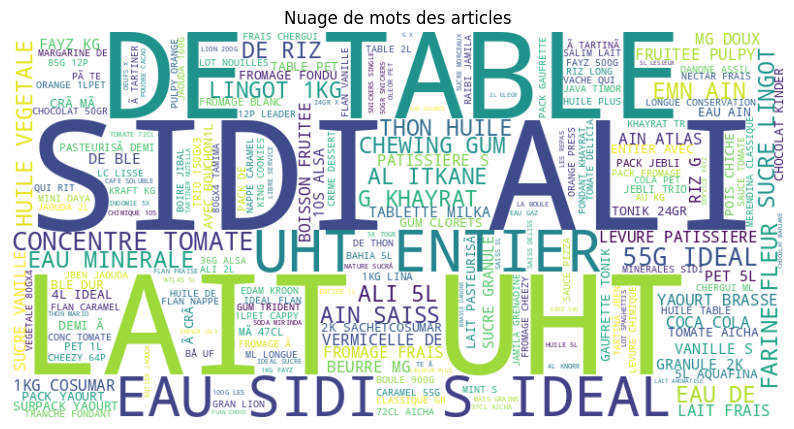

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Joindre tous les articles en une seule chaîne de texte
all_articles = ' '.join(grouped_data['NomArticle'])

# Générer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_articles)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des articles')
plt.show()


In [ ]:
import plotly.express as px
# Count the number of transactions per rayon
rayon_counts = grouped_data['NomRayon'].value_counts().reset_index()
rayon_counts.columns = ['NomRayon', 'Count']

# Create a bar chart
fig_rayon = px.bar(rayon_counts, x='NomRayon', y='Count', title='Nombre de transactions par rayon')
fig_rayon.update_layout(xaxis_title='Rayon', yaxis_title='Nombre de transactions', xaxis_tickangle=-45)
fig_rayon.show()


In [ ]:
# Split the articles and count the frequency
article_counts = grouped_data['NomArticle'].str.split(', ').explode().value_counts().reset_index()
article_counts.columns = ['NomArticle', 'Count']

# Create a bar chart for the most frequent articles
fig_article = px.bar(article_counts.head(20), x='NomArticle', y='Count', title='Articles les plus fréquents (Top 20)')
fig_article.update_layout(xaxis_title='Article', yaxis_title='Nombre de transactions', xaxis_tickangle=-45)
fig_article.show()


In [ ]:
#diagramme circulaire
grouped_data = pd.DataFrame(data)

# Count the number of transactions per rayon
rayon_counts = grouped_data['NomRayon'].value_counts().reset_index()
rayon_counts.columns = ['NomRayon', 'Count']

# Create a pie chart
fig_pie = px.pie(rayon_counts, names='NomRayon', values='Count', title='Proportion des transactions par rayon')
fig_pie.show()

# Application de l'algorithme FP-Growth

**Préparation des données pour FP-Growth**

In [ ]:
import pandas as pd


# Supprimer les espaces de début et de fin des noms de colonnes
data.columns = data.columns.str.strip()

# S'assurer que 'TransactionID' est traité comme une chaîne
data['TransactionID'] = data['TransactionID'].astype(str)

# Remplacer 'TransactionID' par des numéros
data['TransactionID'] = pd.factorize(data['TransactionID'])[0]

# Regrouper les articles par TransactionID et les rassembler en une seule chaîne
df = data.groupby('TransactionID')['NomArticle'].apply(', '.join).reset_index()

# Afficher les premières lignes pour vérifier
print(df.head())




   TransactionID                                         NomArticle
0              0  PACK JEBLI TRIO 150GX3, LOT KETCHUP PLAS + MAY...
1              1  SUCRE LINGOT 1KG COSUMAR, FROMAGE FONDU AU CHE...
2              2  POUDRE DE CACAO AIGUEBELLE 5 SACHETS, SUCRE VA...
3              3  PRINGLES SIZZL N CHILI CHEESE 160GR, KIRI 36P,...
4              4  TRANCHE FONDANT KHAYRAT 24 TR 400G, DAYA FRAIS...


In [ ]:
from mlxtend.preprocessing import TransactionEncoder

from mlxtend.frequent_patterns import fpgrowth

# Convertir la colonne 'NomArticle' en une liste de listes d'articles
transactions = df['NomArticle'].apply(lambda x: [item.strip() for item in x.split(',')])

# Utiliser TransactionEncoder pour convertir les données en format adapté à FP-Growth
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
encoded_df = pd.DataFrame(te_ary, columns=te.columns_)

# Appliquer FP-Growth avec un support minimum de 0.01
frequent_itemsets = fpgrowth(encoded_df, min_support=0.01, use_colnames=True)

# Afficher les motifs fréquents
print(frequent_itemsets)


      support                                           itemsets
0    0.039037             (LAIT PASTEURISÃ‰ DEMI-Ã‰CRÃ‰MÃ‰ 47CL)
1    0.037138                           (PACK JEBLI TRIO 150GX3)
2    0.027367                               (FROMAGE CHEEZY 64P)
3    0.060708                         (SUCRE LINGOT 1KG COSUMAR)
4    0.044316                   (SUCRE GRANULE 2K SACHETCOSUMAR)
..        ...                                                ...
439  0.010095  (10 KG FAYZ, FARINE DE LUXE, THE  BELLAR 6X200...
440  0.010095  (10 KG FAYZ, FARINE DE LUXE, SUCRE LINGOT 1KG ...
441  0.010095  (10 KG FAYZ, SUCRE LINGOT 1KG COSUMAR, THE  BE...
442  0.010095  (10 KG FAYZ, FARINE DE LUXE, SUCRE LINGOT 1KG ...
443  0.010002  (CAFE MOULU ASTA FORCE PROMO 200 GR, SUCRE LIN...

[444 rows x 2 columns]


In [ ]:
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets
0,0.039037,(LAIT PASTEURISÃ‰ DEMI-Ã‰CRÃ‰MÃ‰ 47CL)
1,0.037138,(PACK JEBLI TRIO 150GX3)
2,0.027367,(FROMAGE CHEEZY 64P)
3,0.060708,(SUCRE LINGOT 1KG COSUMAR)
4,0.044316,(SUCRE GRANULE 2K SACHETCOSUMAR)
...,...,...
439,0.010095,"(10 KG FAYZ, FARINE DE LUXE, THE BELLAR 6X200..."
440,0.010095,"(10 KG FAYZ, FARINE DE LUXE, SUCRE LINGOT 1KG ..."
441,0.010095,"(10 KG FAYZ, SUCRE LINGOT 1KG COSUMAR, THE BE..."
442,0.010095,"(10 KG FAYZ, FARINE DE LUXE, SUCRE LINGOT 1KG ..."


In [ ]:
frequent_itemsets.to_excel('frequent_itemsets.xlsx', index=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Générer les règles d'association à partir des motifs fréquents avec une confiance minimum de 0.5
rules_confidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Afficher les règles d'association avec seulement l'antécédent, le conséquent et la confiance
for index, row in rules_confidence.iterrows():
    antecedent = ', '.join(row['antecedents'])
    consequent = ', '.join(row['consequents'])
    confidence = row['confidence']
    print(f"Règle: {antecedent} -> {consequent}, Confiance: {confidence:.2f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Règle: THE  BELLAR 6X200 G, HUILE TABLE 2L OLEOR PET -> 10 KG FAYZ, FARINE DE LUXE, SUCRE LINGOT 1KG COSUMAR, POIS CHICHE FAYZ 1 KG, LENTILLE EXTRA CANADA  1KG FAYZ, Confiance: 0.75
Règle: LENTILLE EXTRA CANADA  1KG FAYZ, THE  BELLAR 6X200 G -> 10 KG FAYZ, FARINE DE LUXE, SUCRE LINGOT 1KG COSUMAR, POIS CHICHE FAYZ 1 KG, HUILE TABLE 2L OLEOR PET, Confiance: 0.96
Règle: LENTILLE EXTRA CANADA  1KG FAYZ, HUILE TABLE 2L OLEOR PET -> 10 KG FAYZ, FARINE DE LUXE, SUCRE LINGOT 1KG COSUMAR, POIS CHICHE FAYZ 1 KG, THE  BELLAR 6X200 G, Confiance: 0.91
Règle: 10 KG FAYZ -> FARINE DE LUXE, SUCRE LINGOT 1KG COSUMAR, POIS CHICHE FAYZ 1 KG, THE  BELLAR 6X200 G, HUILE TABLE 2L OLEOR PET, LENTILLE EXTRA CANADA  1KG FAYZ, Confiance: 0.68
Règle: FARINE DE LUXE -> 10 KG FAYZ, SUCRE LINGOT 1KG COSUMAR, POIS CHICHE FAYZ 1 KG, THE  BELLAR 6X200 G, HUILE TABLE 2L OLEOR PET, LENTILLE EXTRA CANADA  1KG FAYZ, Confiance: 0.69
Règle: POIS 

In [ ]:
from mlxtend.frequent_patterns import association_rules

# Générer les règles d'association à partir des motifs fréquents avec un lift minimum de 1.0
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Afficher les règles d'association avec seulement l'antécédent, le conséquent et le lift
for index, row in rules.iterrows():
    antecedent = ', '.join(row['antecedents'])
    consequent = ', '.join(row['consequents'])
    lift = row['lift']
    print(f"Règle: {antecedent} -> {consequent}, Lift: {lift:.2f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Règle: 10 KG FAYZ, FARINE DE LUXE, DOUBLE CONCENTRE TOMATE  800GR SORYA -> LENTILLE EXTRA CANADA  1KG FAYZ, SUCRE LINGOT 1KG COSUMAR, Lift: 65.12
Règle: 10 KG FAYZ, LENTILLE EXTRA CANADA  1KG FAYZ, FARINE DE LUXE -> SUCRE LINGOT 1KG COSUMAR, DOUBLE CONCENTRE TOMATE  800GR SORYA, Lift: 67.12
Règle: 10 KG FAYZ, LENTILLE EXTRA CANADA  1KG FAYZ, DOUBLE CONCENTRE TOMATE  800GR SORYA -> FARINE DE LUXE, SUCRE LINGOT 1KG COSUMAR, Lift: 68.77
Règle: FARINE DE LUXE, SUCRE LINGOT 1KG COSUMAR, DOUBLE CONCENTRE TOMATE  800GR SORYA -> 10 KG FAYZ, LENTILLE EXTRA CANADA  1KG FAYZ, Lift: 68.91
Règle: LENTILLE EXTRA CANADA  1KG FAYZ, FARINE DE LUXE, SUCRE LINGOT 1KG COSUMAR -> 10 KG FAYZ, DOUBLE CONCENTRE TOMATE  800GR SORYA, Lift: 68.91
Règle: LENTILLE EXTRA CANADA  1KG FAYZ, SUCRE LINGOT 1KG COSUMAR, DOUBLE CONCENTRE TOMATE  800GR SORYA -> 10 KG FAYZ, FARINE DE LUXE, Lift: 66.16
Règle: LENTILLE EXTRA CANADA  1KG FAYZ, FARINE

In [ ]:
# Generate association rules based on support
rules_support = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)

# Display the rules with antecedent, consequent, and support
for index, row in rules_support.iterrows():
    antecedent = ', '.join(row['antecedents'])
    consequent = ', '.join(row['consequents'])
    support = row['support']
    print(f"Rule: {antecedent} -> {consequent}, Support: {support:.2f}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Rule: SUCRE LINGOT 1KG COSUMAR, DOUBLE CONCENTRE TOMATE  800GR SORYA, FARINE DE LUXE -> LENTILLE EXTRA CANADA  1KG FAYZ, 10 KG FAYZ, Support: 0.01
Rule: DOUBLE CONCENTRE TOMATE  800GR SORYA, FARINE DE LUXE, 10 KG FAYZ -> LENTILLE EXTRA CANADA  1KG FAYZ, SUCRE LINGOT 1KG COSUMAR, Support: 0.01
Rule: SUCRE LINGOT 1KG COSUMAR, FARINE DE LUXE, 10 KG FAYZ -> LENTILLE EXTRA CANADA  1KG FAYZ, DOUBLE CONCENTRE TOMATE  800GR SORYA, Support: 0.01
Rule: LENTILLE EXTRA CANADA  1KG FAYZ, SUCRE LINGOT 1KG COSUMAR, DOUBLE CONCENTRE TOMATE  800GR SORYA -> FARINE DE LUXE, 10 KG FAYZ, Support: 0.01
Rule: LENTILLE EXTRA CANADA  1KG FAYZ, DOUBLE CONCENTRE TOMATE  800GR SORYA, 10 KG FAYZ -> SUCRE LINGOT 1KG COSUMAR, FARINE DE LUXE, Support: 0.01
Rule: LENTILLE EXTRA CANADA  1KG FAYZ, SUCRE LINGOT 1KG COSUMAR, 10 KG FAYZ -> DOUBLE CONCENTRE TOMATE  800GR SORYA, FARINE DE LUXE, Support: 0.01
Rule: SUCRE LINGOT 1KG COSUMAR, DOUBLE C